<a href="https://colab.research.google.com/github/marioTavFer/DSA/blob/teste00/ia_macroeconomia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A interseção entre Macroeconomia e Inteligência Artificial (IA) está se tornando cada vez mais evidente e promissora. A IA oferece métodos poderosos para compreender e prever variáveis agregadas da economia, como ciclos econômicos, decisões de políticas monetárias e previsões de diferentes indicadores econômicos. Utilizando algoritmos de Machine Learning os economistas podem analisar grandes volumes de dados econômicos para identificar padrões e tendências, fornecendo insighs.

O Python, com suas bibliotecas especializadas em IA, torna o processo de análise e modelagem mais acessível e eficiente. Ao aplicar técnicas de IA na Macroeconomia, é possível melhorar significativamente nossa compreensão dos fenômenos econômicos e a precisão de nossas previsões, abrindo novas oportunidades para análise e tomada de decisões.

## IA e Machine Learning

IA, ou Inteligência Artificial, é um campo da ciência da computação que se concentra no desenvolvimento de sistemas capazes de realizar tarefas que normalmente exigiriam inteligência humana. Essas tarefas podem incluir reconhecimento de padrões, aprendizado, raciocínio, resolução de problemas, compreensão da linguagem natural e interação com o ambiente.

Existem várias abordagens e tipos de IA, cada uma com suas características e aplicações específicas. Uma que apresentou-se útil para a área de economia, especialmente na previsão de modelos, refere-se a IA Aprendizado de Máquina (Machine Learning).

A **IA Aprendizado de Máquina (Machine Learning)** é uma das áreas mais proeminentes da IA atualmente, o aprendizado de máquina envolve algoritmos que permitem que sistemas computacionais aprendam a partir de dados sem serem explicitamente programados. Existem várias técnicas de aprendizado de máquina, incluindo aprendizado supervisionado, não supervisionado, e por reforço. Não somente para a previsão de dados, o aprendizado de máquina é também é utilizado em uma variedade de aplicações, incluindo reconhecimento de padrões, classificação, recomendação e entre diversas outras possibilidades.

Modelos macroeconômicos tradicionais geralmente possuem uma dependência de suposições simplificadas e relações lineares entre variáveis econômicas. No entanto, a economia é um sistema complexo e interconectado, com uma infinidade de variáveis que influenciam umas às outras de maneiras não-lineares. IA e Machine Learning podem lidar melhor com essa complexidade, permitindo previsões mais precisas e sofisticadas.

No presente exercício iremos mostrar o uso do IA Aprendizado de Máquina para realizar a previsão da probabilidade de recessão nos EUA, conforme três diferentes modelos de Machine Learning.

## Prevendo a probabilidade de recessão

Para mostrar um exemplo do uso de machine learning para previsão de dados macroeconômicos, decidimos criar diferentes modelos para previsão de recessão nos Estados Unidos.

Aqui utilizaremos:

1. **Random Forest**:
   - Random Forest é um algoritmo de aprendizado de máquina que opera criando uma "floresta" de árvores de decisão durante o treinamento.
   - Cada árvore na floresta é construída de forma independente e aleatória, utilizando amostras aleatórias do conjunto de dados de treinamento e um subconjunto aleatório de características em cada divisão.
   - Para fazer previsões, as árvores individuais votam em uma classe ou fornecem uma previsão contínua, e a previsão final é determinada pela votação ou pela média das previsões das árvores individuais.
   - Random Forest é conhecida por sua eficácia em lidar com uma variedade de problemas de classificação e regressão, e é frequentemente utilizada devido à sua capacidade de reduzir o overfitting e fornecer estimativas de importância das características.

2. **KNN**:
   - KNN é um algoritmo de aprendizado de máquina utilizado tanto para classificação quanto para regressão.
   - Em KNN, as previsões são feitas com base na proximidade dos pontos de dados de treinamento no espaço de características.
   - Para fazer uma previsão para um novo ponto de dados, o algoritmo encontra os k pontos de dados de treinamento mais próximos ao novo ponto (onde k é um número especificado pelo usuário), e a classe ou o valor alvo desses pontos é usado para fazer a previsão.
   - KNN é um algoritmo simples de entender e implementar, mas pode ser computacionalmente caro para conjuntos de dados grandes e pode ser sensível à escala e à dimensionalidade.

3. **Regressão Logística**:
   - A regressão logística é um algoritmo de aprendizado supervisionado utilizado para problemas de classificação binária.
   - Apesar do nome, a regressão logística é usada para prever a probabilidade de que um determinado ponto de dados pertença a uma classe ou categoria específica.
   - A regressão logística utiliza uma função logística para modelar a relação entre as características de entrada e a probabilidade de pertencer a uma classe.
   - Durante o treinamento, os parâmetros do modelo são ajustados para minimizar a diferença entre as previsões do modelo e os valores reais observados.

Estaremos utilizando as seguintes variáveis:

- Taxa de juros do tesouro americano de curto (3 meses) e longo (10 anos) prazo,

- Empregados (excluindo agrícolas)

- Inflação.

Além disso é incluída uma variável de diferença entre a taxa de longo e a de curto prazo, para determinar o ângulo da curva de juros. Para todas as variáveis explicativas são incluídos os lags de 3,6,9 e 12 meses. Nossa variável de interesse é o indicador de recessão mensal produzido pelo NBER adiantado 12 meses. Ou seja, nosso interesse é prever se vai haver uma recessão nos 12 meses subsequentes.

# 1. Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
sns.set()

# 2. Dados

Utilizaremos uma variação do cross validation que ao invés de ordenar os dados aleatóriamente, ordena sequencialmente no tempo.

Utilizaremos os seguintes modelos: Lasso, Random forest e KNN. Todos estão sendo aplicados com o uso do pacote caret, que possibilita um uso uniforme de centenas de algoritmos de machine learning.

In [ ]:
# Selecionar os tickers
tickers = ["USREC", "GS10", "TB3MS", "PAYEMS", "CPIAUCSL"]

# Coletar os dados do FRED usando pandas_datareader
data_raw = pdr.get_data_fred(tickers, start = "1975-01-01")

# Realizar os tratamentos
data = (
    data_raw
    .assign(slope_yield=data_raw["GS10"] - data_raw["TB3MS"])
    .assign(USREC=data_raw["USREC"].shift(-12).astype("category"))
    .assign(GS10_lag3=data_raw["GS10"].shift(3))
    .assign(GS10_lag6=data_raw["GS10"].shift(6))
    .assign(GS10_lag9=data_raw["GS10"].shift(9))
    .assign(GS10_lag12=data_raw["GS10"].shift(12))
    .loc["1980":"2020"]
    .reset_index(names = 'date')
)

In [ ]:
data

,date,USREC,GS10,TB3MS,PAYEMS,CPIAUCSL,slope_yield,GS10_lag3,GS10_lag6,GS10_lag9,GS10_lag12
0,1980-01-01,0.0,10.80,12.00,90800,78.000,-1.20,10.30,8.95,9.18,9.10
1,1980-02-01,0.0,12.41,12.86,90883,79.000,-0.45,10.65,9.03,9.25,9.10
2,1980-03-01,0.0,12.75,15.20,90994,80.100,-2.45,10.39,9.33,8.91,9.12
3,1980-04-01,0.0,11.47,13.20,90849,80.900,-1.73,10.80,10.30,8.95,9.18
4,1980-05-01,0.0,10.18,8.58,90420,81.700,1.60,12.41,10.65,9.03,9.25
...,...,...,...,...,...,...,...,...,...,...,...
487,2020-08-01,0.0,0.65,0.10,140774,259.366,0.55,0.67,1.50,1.81,1.63
488,2020-09-01,0.0,0.68,0.11,141820,259.951,0.57,0.73,0.87,1.86,1.70
489,2020-10-01,0.0,0.79,0.10,142493,260.249,0.69,0.62,0.66,1.76,1.71
490,2020-11-01,0.0,0.87,0.09,142761,260.895,0.78,0.65,0.67,1.50,1.81


# 3. Modelos

In [ ]:
# Definindo o objeto de controle de treinamento
tscv = TimeSeriesSplit(n_splits=5)

# Treinamento de um modelo usando Regressão Logística (LogisticRegression)
lr_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

# Treinamento de um modelo usando Random Forest (RandomForestClassifier)
rf_model = RandomForestClassifier()

# Treinamento de um modelo usando k-Nearest Neighbors (KNeighborsClassifier)
knn_model = KNeighborsClassifier()

# Coletar os dados e realizar os tratamentos (como nos códigos anteriores)

# Definir as variáveis preditoras e a variável de resposta
X = data.drop(columns=["USREC", "date"])
y = data["USREC"]

# Pré-processamento: Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Loop para realizar validação cruzada em séries temporais
for train_index, test_index in tscv.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Treinar e avaliar o modelo de Regressão Logística
    lr_model.fit(X_train, y_train)
    lr_pred = lr_model.predict(X_test)
    lr_accuracy = accuracy_score(y_test, lr_pred)
    print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")

    # Treinar e avaliar o modelo Random Forest
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)
    rf_accuracy = accuracy_score(y_test, rf_pred)
    print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

    # Treinar e avaliar o modelo k-Nearest Neighbors
    knn_model.fit(X_train, y_train)
    knn_pred = knn_model.predict(X_test)
    knn_accuracy = accuracy_score(y_test, knn_pred)
    print(f"k-Nearest Neighbors Accuracy: {knn_accuracy:.4f}")




Logistic Regression Accuracy: 0.8171
Random Forest Accuracy: 0.9024
k-Nearest Neighbors Accuracy: 0.9024
Logistic Regression Accuracy: 0.9756
Random Forest Accuracy: 0.9146
k-Nearest Neighbors Accuracy: 0.9390
Logistic Regression Accuracy: 0.8902
Random Forest Accuracy: 0.5366
k-Nearest Neighbors Accuracy: 0.9268
Logistic Regression Accuracy: 0.8293
Random Forest Accuracy: 0.8659
k-Nearest Neighbors Accuracy: 0.8415
Logistic Regression Accuracy: 0.8171
Random Forest Accuracy: 0.4878
k-Nearest Neighbors Accuracy: 0.9756


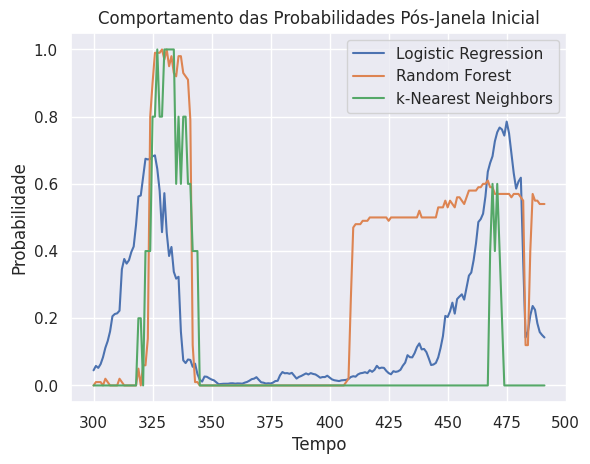

In [ ]:
# Obtendo as probabilidades previstas para o modelo de Regressão Logística
lr_probs = lr_model.predict_proba(X_scaled)[:, 1]
rf_probs = rf_model.predict_proba(X_scaled)[:, 1]
knn_probs = knn_model.predict_proba(X_scaled)[:, 1]

# Criando um vetor de índices para o período pós-janela inicial
post_initial_window = np.arange(300, len(data))

# Selecionando as probabilidades correspondentes ao período pós-janela inicial
lr_probs_post_window = lr_probs[post_initial_window]
rf_probs_post_window = rf_probs[post_initial_window]
knn_probs_post_window = knn_probs[post_initial_window]

# Criando um DataFrame para armazenar os dados de probabilidade
prob_data = pd.DataFrame({
    "Time": post_initial_window,
    "Logistic Regression": lr_probs_post_window,
    "RandomForest": rf_probs_post_window,
    "kNN": knn_probs_post_window
})

# Plotando o comportamento das probabilidades
plt.plot(prob_data["Time"], prob_data["Logistic Regression"], label="Logistic Regression")
plt.plot(prob_data["Time"], prob_data["RandomForest"], label="Random Forest")
plt.plot(prob_data["Time"], prob_data["kNN"], label="k-Nearest Neighbors")
plt.title("Comportamento das Probabilidades Pós-Janela Inicial")
plt.xlabel("Tempo")
plt.ylabel("Probabilidade")
plt.legend()
plt.show()